# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../GitHub/python-ml-course/datasets/bank/bank.csv",sep=";")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data["y"]=(data["y"]=="yes").astype(int)

In [6]:
data.groupby("y").count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
0,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668
1,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451


In [7]:
data.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data.education=np.where(data.education=="basic.4y","Basic",data.education)
data.education=np.where(data.education=="basic.6y","Basic",data.education)
data.education=np.where(data.education=="basic.9y","Basic",data.education)

data.education=np.where(data.education=="high.school","High School",data.education)
data.education=np.where(data.education=="professional.course","Professional Course",data.education)
data.education=np.where(data.education=="university.degree","University Degree",data.education)
data.education=np.where(data.education=="illiterate","Illiterate",data.education)
data.education=np.where(data.education=="unknown","Unknown",data.education)


In [9]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,High School,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,High School,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,High School,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [10]:
data.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

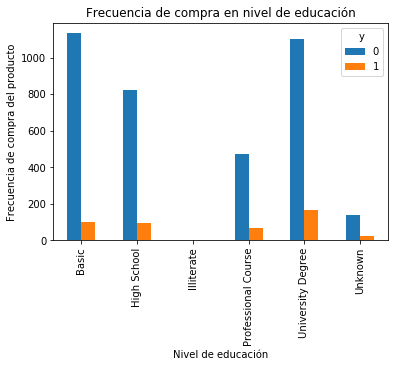

In [13]:
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

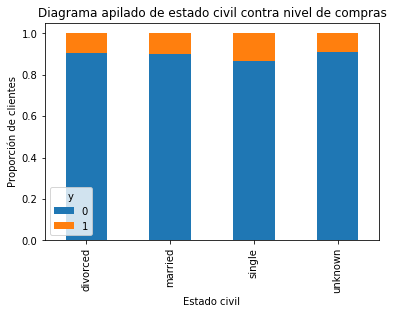

In [14]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado de estado civil contra nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Parece la misma para los diferentes estados, por lo tanto es dificil que se use como variable predictora

Text(0, 0.5, 'Proporción de clientes')

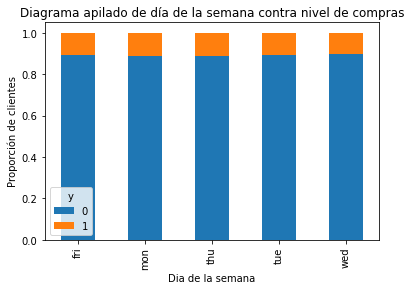

In [15]:
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado de día de la semana contra nivel de compras")
plt.xlabel("Dia de la semana")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

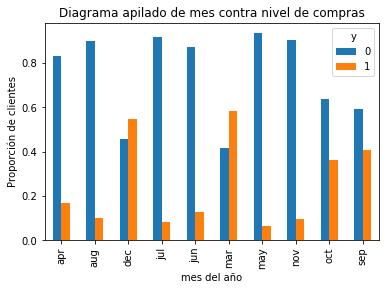

In [16]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=False)
plt.title("Diagrama apilado de mes contra nivel de compras")
plt.xlabel("mes del año")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

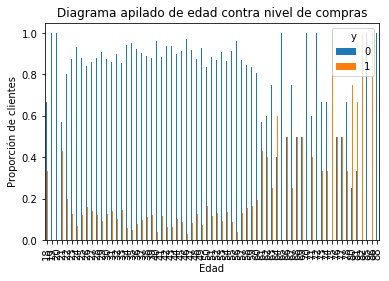

In [17]:
table=pd.crosstab(data.age,data.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=False)
plt.title("Diagrama apilado de edad contra nivel de compras")
plt.xlabel("Edad")
plt.ylabel("Proporción de clientes")

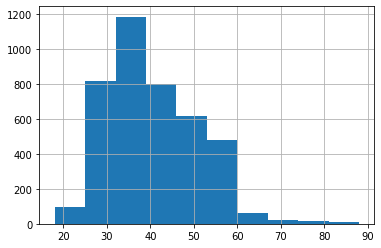

In [18]:
data.age.hist()

Text(0, 0.5, 'Proporción de clientes')

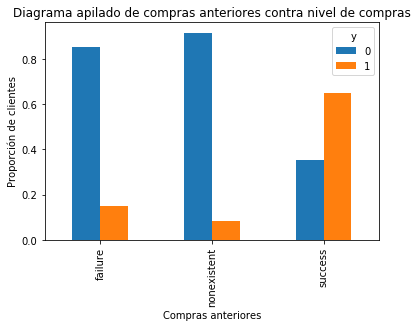

In [19]:
table=pd.crosstab(data.poutcome,data.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=False)
plt.title("Diagrama apilado de compras anteriores contra nivel de compras")
plt.xlabel("Compras anteriores")
plt.ylabel("Proporción de clientes")

## Conversión de variables categóricas a dummies

In [20]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [21]:
cats=['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month', 'day_of_week','poutcome']

In [22]:
for category in cats:
    cat_list="cat"+"_"+category
    cat_dummies=pd.get_dummies(data[category],prefix=cat_list)
#     print(cat_dummies)
    data_new=data.join(cat_dummies)
    data=data_new

In [23]:
data_vars=data.columns.values.tolist()

In [24]:
to_keep=[v for v in data_vars if v not in cats]

In [25]:
bank_data=data[to_keep]

In [26]:
bank_data_vars=bank_data.columns.values.tolist()
Y=["y"] #Columna a predecir
X=[v for v in bank_data_vars if v not in Y] #Variables predictoras

## Selección de rasgos

Variables más significativas para predecir los valores de salida del modelo

In [27]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
n=12
lr=LogisticRegression()
rfe=RFE(lr,n)
rfe=rfe.fit(bank_data[X],bank_data[Y].values.ravel())

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-pa

In [29]:
print(rfe.support_,rfe.ranking_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True] [36 44 18 45  1 14 27 25  1 42 22  3  1 38  2 40  1  5 30 34 12 46 19 33
 31 50 26 13 48 21 32  8 37 35 49 20  6 10 15  9 23 16  4 41 24  1  1  1
  1  1 17  1 47 39 28 43 29 11  1  7  1]


In [30]:
list(zip(X,rfe.support_,rfe.ranking_))

[('age', False, 36),
 ('duration', False, 44),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 42),
 ('cat_job_admin.', False, 22),
 ('cat_job_blue-collar', False, 3),
 ('cat_job_entrepreneur', True, 1),
 ('cat_job_housemaid', False, 38),
 ('cat_job_management', False, 2),
 ('cat_job_retired', False, 40),
 ('cat_job_self-employed', True, 1),
 ('cat_job_services', False, 5),
 ('cat_job_student', False, 30),
 ('cat_job_technician', False, 34),
 ('cat_job_unemployed', False, 12),
 ('cat_job_unknown', False, 46),
 ('cat_marital_divorced', False, 19),
 ('cat_marital_married', False, 33),
 ('cat_marital_single', False, 31),
 ('cat_marital_unknown', False, 50),
 ('cat_education_Basic', False, 26),
 ('cat_education_High School', False, 13),
 ('cat_education_Illiterate', False, 48),
 ('cat_education_Professional Course', False, 21

In [31]:
df_RME=pd.DataFrame(
    {"Vars":X,
     "Rank":rfe.ranking_.tolist()
    }
)

In [32]:
lv=df_RME["Rank"]==1
cols=df_RME.Vars[lv].tolist()
cols

['previous',
 'euribor3m',
 'cat_job_entrepreneur',
 'cat_job_self-employed',
 'cat_month_dec',
 'cat_month_jul',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_month_oct',
 'cat_poutcome_failure',
 'cat_poutcome_success']

In [33]:
X=bank_data[cols]
Y=bank_data["y"]

## Implementación del modelo

### Con statsmodel.api

In [34]:
import statsmodels.api as sm

In [35]:
logit_model=sm.Logit(np.asarray(Y),X)

In [38]:
results=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.192      
Dependent Variable:   y                 AIC:               2323.8813  
Date:                 2020-01-05 11:47  BIC:               2399.7617  
No. Observations:     4119              Log-Likelihood:    -1149.9    
Df Model:             11                LL-Null:           -1422.9    
Df Residuals:         4107              LLR p-value:       4.9751e-110
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
previous               0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
euribor3m             -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
cat_job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
cat_job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
cat_month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
cat_month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
cat_month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
cat_month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
cat_month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
cat_month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
cat_poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
cat_poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
======================================================================

"""

P valor cuanto más pequeño mucho mayor es la significación en el modelo

### con scikit-learn

In [42]:
from sklearn import linear_model
logit_model=linear_model.LogisticRegression()
logit_model.fit(X,Y)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logit_model.score(X,Y)

0.9021607186210245

Un 10.9% de las personas compran. Si dijeramos que ninguno compraría de forma vanal se obtendría un 89.05%

In [46]:
1-Y.mean()

0.8905074047098811

In [47]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.3798316142096139]
1,euribor3m,[-0.5027490712653142]
2,cat_job_entrepreneur,[-0.34306615561163367]
3,cat_job_self-employed,[-0.33506416426093977]
4,cat_month_dec,[0.8733167999349573]
5,cat_month_jul,[0.3820874456812563]
6,cat_month_jun,[0.5096949858004949]
7,cat_month_mar,[1.270361228864782]
8,cat_month_may,[-0.7430896290668391]
9,cat_month_oct,[0.41185574423171945]


## Validación del modelo logístico

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [55]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
probs=lm.predict_proba(X_text)

In [57]:
probs

array([[0.93352157, 0.06647843],
       [0.88259365, 0.11740635],
       [0.93040666, 0.06959334],
       ...,
       [0.73273217, 0.26726783],
       [0.97862459, 0.02137541],
       [0.24746608, 0.75253392]])

In [59]:
prediction=lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [61]:
prob=probs[:,1]
prob

array([0.06647843, 0.11740635, 0.06959334, ..., 0.26726783, 0.02137541,
       0.75253392])

In [62]:
probs.shape

(1236, 2)

In [79]:
prob_df=pd.DataFrame(prob)
threshold=0.15
prob_df["Prediction"]=np.where(prob_df[0]>threshold,1,0)
prob_df

,0,Prediction
0,0.066478,0
1,0.117406,0
2,0.069593,0
3,0.062666,0
4,0.065086,0
...,...,...
1231,0.062666,0
1232,0.062606,0
1233,0.267268,1
1234,0.021375,0


In [80]:
pd.crosstab(prob_df.Prediction,columns="count")

col_0,count
Prediction,
0,1019
1,217


In [81]:
25/len(prob_df)

0.020226537216828478

In [94]:
from sklearn import metrics
metrics.accuracy_score(Y_test,prediction)

0.9021035598705501

##  Validación cruzada

In [95]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=10)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-pa

In [96]:
scores

array([0.92493947, 0.90048544, 0.90291262, 0.89563107, 0.90291262,
       0.90533981, 0.8907767 , 0.89563107, 0.90024331, 0.90024331])

In [97]:
scores.mean()

0.9019115405705567